In [1]:
#loading the conditional-GAN generator model and generate images
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.models import load_model
from matplotlib import pyplot

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


In [2]:
# generate points in latent space as input for the generator
def generate_latent_points_vary_dimension(latent_dim, n_samples,n_vary_dim):
    # generate points in the latent space
    x_input = randn(latent_dim + n_samples -1)
    z_input = []
    for i in range(n_samples):
        z_vect = []
        flag = 0
        for j in range(latent_dim):
            if j==n_vary_dim:
                z_vect.append(x_input[i])
                flag = 1
            else:
                z_vect.append(x_input[n_samples+j-flag])
        z_input.append(asarray(z_vect))
    
    return z_input

def generate_latent_points(latent_dim, n_samples, n_classes=10):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    z_input = x_input.reshape(n_samples, latent_dim)
    # generate labels
    labels = randint(0, n_classes, n_samples)
    return [z_input, labels]

In [8]:
# create and plot generated images
def save_plot(examples, n):
    # plot images
    for i in range(n * n):
        # define subplot
        pyplot.subplot(n, n, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
    pyplot.show()
    
# create and plot generated images
def save_plot_1(examples, n):
    # plot images
    for i in range(n):
        # define subplot
        pyplot.subplot(1, n, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(examples[i, :, :, 0], cmap='gray')
    pyplot.show()

In [4]:
# load model
weight_filename = input()
model = load_model(weight_filename)

model_23400.h5


W0930 03:48:42.788161 4488762816 deprecation_wrapper.py:119] From /Users/avinaku5/Anaconda/anaconda3/envs/newenvt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0930 03:48:42.819643 4488762816 deprecation_wrapper.py:119] From /Users/avinaku5/Anaconda/anaconda3/envs/newenvt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0930 03:48:42.944756 4488762816 deprecation_wrapper.py:119] From /Users/avinaku5/Anaconda/anaconda3/envs/newenvt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0930 03:48:42.945264 4488762816 deprecation_wrapper.py:119] From /Users/avinaku5/Anaconda/anaconda3/envs/newenvt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: 

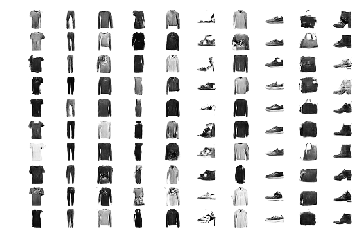

In [5]:
# generate images of its corresponding class labels and latent space
latent_points, labels = generate_latent_points(100, 100)
# specify labels
labels = asarray([x for _ in range(10) for x in range(10)])
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, 10)

Enter class labels:
5


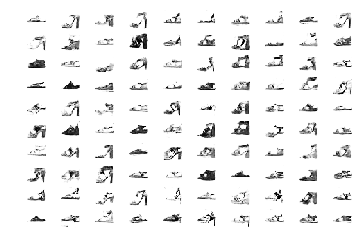

In [6]:
# generate images of input class label and varying latent space
print("Enter class labels:")
class_label = int(input())

# specify labels
labels = asarray([x for _ in range(10) for x in range(10)])
for i in range(len(labels)):
    labels[i] = class_label
    
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, 10)

Enter dimension which you want to vary:
32
Enter class labels:
2


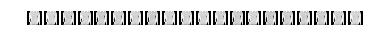

In [13]:
# generate images of input class label and varying any one dimension in latent space
print("Enter dimension which you want to vary:")
n_dim_vary = int(input())
print("Enter class labels:")
class_label = int(input())

latent_points = generate_latent_points_vary_dimension(100, 20, n_dim_vary)
# specify labels
labels = asarray([class_label for i in range(20)])

X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot_1(X, 20)